# Zomato EDA

**Objective**: To analysis the restorent data, which are registered on zomato

**Buisness Success criteria**:- Increase the order by atleast 10% to 20%

**Economic Success criteria**:- Increase the sales atlest 10%

**Dataset**:

1. name = Nmae of the restorant

2. online_order = Customer placed order online or offline

3. book_table = Pre-booking of the table

4. rate = ratting given to the restorent

5. votes = how many vote given to the restorent

6. approx_cost(for two people) = Total cost

7. listed_in(type) = Type of restorent




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Zomato data .csv")

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
# Top 5 row
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
# Dimension of the dataset
df.shape

(148, 7)

In [6]:
# Clean the rate
def handlerate(value):
  value = str(value).split("/")[0]
  return float(value)

In [7]:
df['rate'] = df['rate'].apply(handlerate)

In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [13]:
# Check Missing values
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


### What type of restaurant do the majority of customers order from?

In [19]:
df['listed_in(type)'].value_counts()

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


Text(0.5, 1.0, 'Number of times order Placed in the Restaurant')

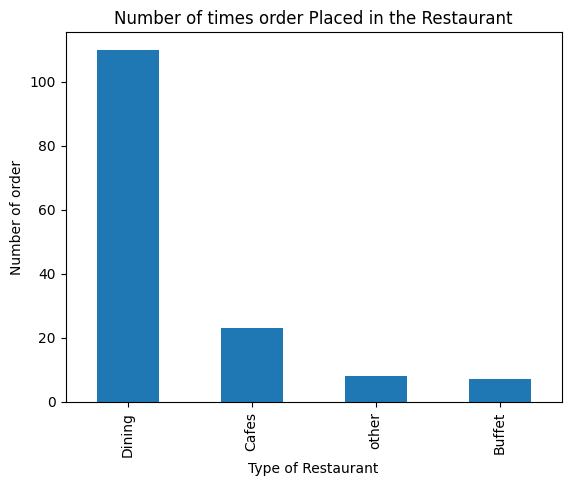

In [25]:
df['listed_in(type)'].value_counts().plot(kind = 'bar')
plt.xlabel('Type of Restaurant')
plt.ylabel('Number of order')
plt.title('Number of times order Placed in the Restaurant')

In the Dining type maximum order placed

In [26]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


### How many votes has each type of restaurant received from customers?

In [32]:
df.groupby('listed_in(type)')['votes'].sum()

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0.5, 1.0, 'Number of votes received by the Restaurant')

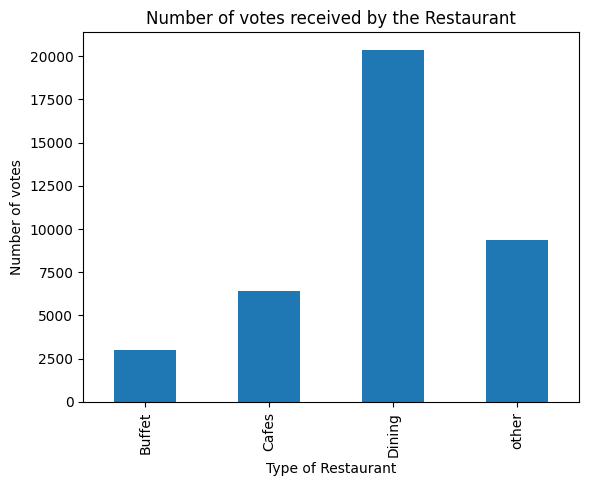

In [30]:
df.groupby('listed_in(type)')['votes'].sum().plot(kind='bar')
plt.xlabel('Type of Restaurant')
plt.ylabel('Number of votes')
plt.title('Number of votes received by the Restaurant')

In [33]:
df.groupby('listed_in(type)')['votes'].mean()

,votes
listed_in(type),
Buffet,432.571429
Cafes,279.739130
Dining,185.118182
other,1170.875000


Text(0.5, 1.0, 'Number of votes received by the Restaurant')

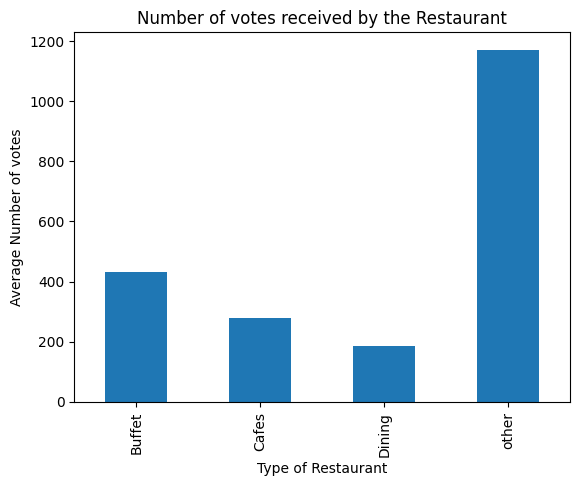

In [35]:
df.groupby('listed_in(type)')['votes'].mean().plot(kind='bar')
plt.xlabel('Type of Restaurant')
plt.ylabel('Average Number of votes')
plt.title('Number of votes received by the Restaurant')

Maximum Voat recived by Dining type restorent.But on an average other type restorant got more vote as compaired to other and dining type restorent got less vote

### What are the ratings that the majority of restaurants have received?

(array([ 1.,  9.,  9., 21., 18., 26., 30., 21.,  9.,  4.]),
 array([2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6]),
 <BarContainer object of 10 artists>)

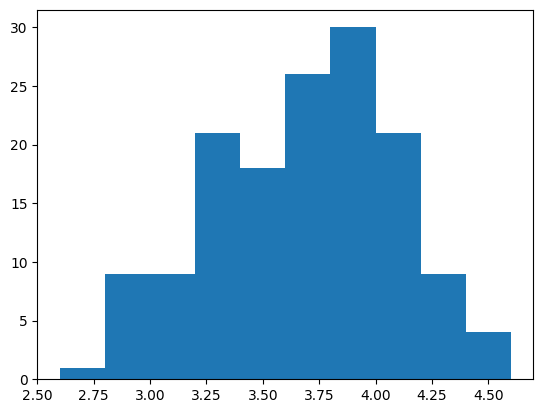

In [38]:
plt.hist(df['rate'])

Majority of the restorent got 3.5 to 4 rating

### Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [39]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<BarContainer object of 148 artists>

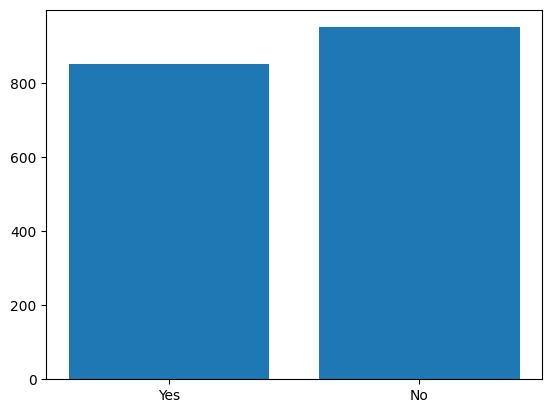

In [43]:
plt.bar(df['online_order'],df['approx_cost(for two people)'])

In [44]:
df.groupby(df['online_order'])['approx_cost(for two people)'].mean()

,approx_cost(for two people)
online_order,
No,358.888889
Yes,510.344828


Average cost of online order is more then the offline order.

<Axes: ylabel='Frequency'>

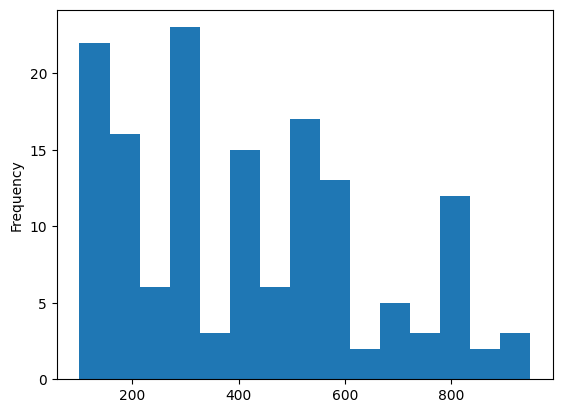

In [17]:
df['approx_cost(for two people)'].plot(kind = 'hist', bins = 15)

200 to 300 cost order placed maximum.

### Which mode (online or offline) has received the maximum rating?

In [49]:
df.groupby('online_order')['rate'].mean()

,rate
online_order,
No,3.487778
Yes,3.858621


<Axes: xlabel='online_order'>

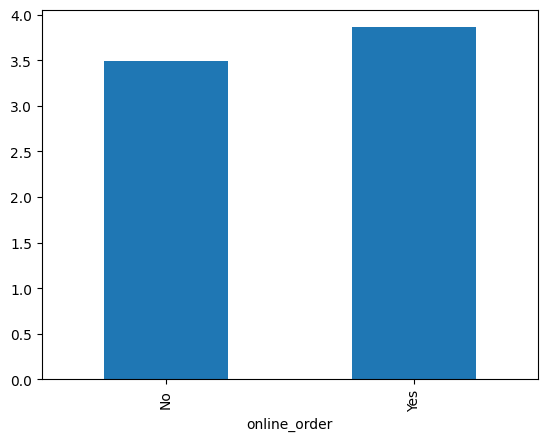

In [50]:
df.groupby('online_order')['rate'].mean().plot(kind = 'bar')

Both Online and offline mode recive almost same rating

### Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [56]:
df.groupby(['online_order','listed_in(type)'])['name'].count()

online_order  listed_in(type)
No            Buffet              3
              Cafes               8
              Dining             77
              other               2
Yes           Buffet              4
              Cafes              15
              Dining             33
              other               6
Name: name, dtype: int64

Text(0.5, 1.0, 'Count of Restaurant')

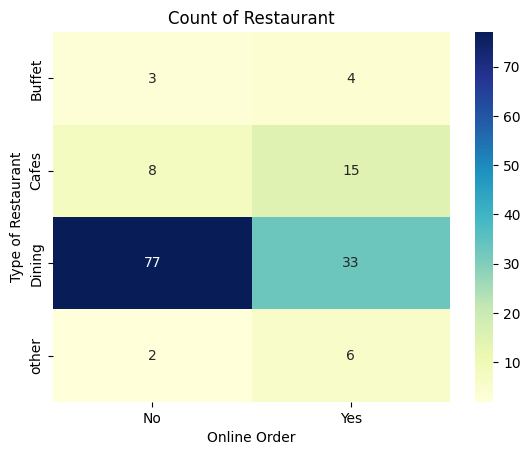

In [68]:
pt = df.pivot_table(index = 'listed_in(type)',columns = 'online_order',values = 'name',aggfunc = 'count')
sns.heatmap(pt,annot = True, cmap = 'YlGnBu')
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.title('Count of Restaurant')

Dining type restorent recived maximum offline order